# Projet 5 - Optimiser la gestion des données d'une boutique

## <u>1- Importation</u>

### 1.1 - Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.2 - données

In [2]:
erp = pd.read_excel("erp.xlsx")
web = pd.read_excel("web.xlsx")
liaison = pd.read_excel("liaison.xlsx")

## <u>2 - Exploration des dataframes</u>

### <u>2.1 - ERP</u>

### 2.1.1 - Informations du dataframe

In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


#### Le dataframe <u>ERP</u> compte 825 lignes (indexées de 0 à 824) ne comportant aucune valeur NULL et 5 colonnes dont 1 de type "float", 3 de type "int" et 1 de type "object".

### 2.1.2 - Visualisation des séries

In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### <u>2.2 - WEB</u>

### 2.2.1 - Informations du dataframe

In [5]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

#### Le dataframe <u>WEB</u> compte 1513 lignes (indexées de 0 à 1512)  comportant des valeur NULL et 28 colonnes dont 4 sont de type "date", 10 de type "float", 3 de type "int" et 11 de type "object".
#### On peut remarquer que la série SKU compte 1428 valeurs non-null alors que d'autres, comme "post_title" en comptent 1430. Après analyse du dataframe, on peut remarquer que 2 lignes ont une valeur nulle sur la référence "SKU", mais pas sur d'autres informations (taxabilité,titre, desciption,etc), contrairement à la majorité des autres lignes ayant la totalité de leurs valeurs étant nulles.
#### On peut donc en déduire que ces 2 lignes ne comportent qu'une erreur de saisie. (Je demanderai au service concerné quel genre d'erreur a bien pu être commise afin de la corriger de manière pertinente)
#### Je vais donc supprimer toutes les lignes ne comportant que des valeurs nulles et conserver ces 2 là avec le reste des données correctes, après avoir supprimé les séries ne comportant aucune donnée autre que la valeur 0 (étant une valeur unique dans ce cas de figure)

### 2.2.2 - Visualisation des séries

In [6]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### 2.2.3 - Suppression des séries comportant une valeur unique.

#### Calcul du nombre de valeurs uniques dans le dataframe et suppression des colonnes n'ayant qu'une valeur unique:
#### - Création du dataframe "web_unique" qui contient le nombre de valeurs uniques pour chaque colonne de "web".
#### - La fonction "Series.unique" obtient le nombre de valeurs uniques pour chaque colonne.
#### - La variable "drop_col" contient les index de "web_unique", par indexation booléenne, vérifiant ainsi quelles colonnes n'ont qu'une seule valeur unique.
#### - Suppression des séries de "web" qui ont été identifiées comme n'ayant qu'une seule valeur unique, à l'aide de la fonction ".drop", le tout dans l'axe des colonnes (axis=1).

In [7]:
web_unique = web.apply(pd.Series.nunique)
drop_col = web_unique[web_unique  == 1].index
web = web.drop(drop_col, axis=1)

### 2.2.4 - Vérification de la suppression des séries comportant les valeurs uniques

In [8]:
web.head()

,sku,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product


#### Les séries comportant des valeurs uniques ont bien été supprimées

###  2.2.5 - Comptage des valeurs NULL 

In [9]:
web.isnull().sum()

sku                        85
total_sales                83
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
guid                       83
post_type                  83
dtype: int64

In [10]:
web["sku"].isnull().sum()

85

### 2.2.6 - Suppression des lignes où sku comporte une valeur nulle

In [11]:
web = web.dropna(subset=["sku"])
web.isnull().sum()

sku                         0
total_sales                 0
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
guid                        0
post_type                   0
dtype: int64

### La série "SKU" ne comporte plus de valeur nulle

In [12]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   total_sales            1428 non-null   float64       
 2   tax_class              0 non-null      float64       
 3   post_author            1428 non-null   float64       
 4   post_date              1428 non-null   datetime64[ns]
 5   post_date_gmt          1428 non-null   datetime64[ns]
 6   post_content           0 non-null      float64       
 7   post_title             1428 non-null   object        
 8   post_excerpt           714 non-null    object        
 9   post_password          0 non-null      float64       
 10  post_name              1428 non-null   object        
 11  post_modified          1428 non-null   datetime64[ns]
 12  post_modified_gmt      1428 non-null   datetime64[ns]
 13  pos

#### le dataframe "WEB" comporte à présent 1428 lignes.

### 2.2.7 - Renommage "sku" en "id_web" pour une fusion à venir

In [13]:
web.rename(columns = {"sku" : "id_web"},inplace = True)
web.columns

Index(['id_web', 'total_sales', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_password', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'guid', 'post_type'],
      dtype='object')

#### La série "SKU" a bien été renomée "id_web"

### <u>2.3 - LIAISON</u>

### 2.3.1 - Informations du dataframe

In [14]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


#### Le dataframe <u>LIAISON</u> compte 825 lignes (indexées de 0 à 824) ne comportant aucune valeur NULL et 2 colonnes dont 1 est de  type "int" et 1 de type "object".

### 2.3.2 - Visualisation des séries

In [15]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


## <u>3 - Vérification unicité des clés primaires</u>

### 3.1 - Dataframe ERP

In [16]:
(erp["product_id"].duplicated()).sum()

0

#### Il n'y a aucun doublon dans les clés primaire du dataframe ERP.

### 3.2 - Dataframe WEB

In [17]:
(web["id_web"].duplicated()).sum()

714

#### Le dataframe WEB comporte 715 doublons dans ses clés primaires.

### 3.2.1 - Visualisation des valeurs en doublon.

In [18]:
web.groupby("id_web").agg({"id_web":"count"})

,id_web
id_web,
38,2
41,2
304,2
523,2
531,2
...,...
19820,2
19821,2
19822,2


### 3.2.2 - Visualisation d'échantillons de doublons

In [19]:
web.loc[web["id_web"] == 38]

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
339,38,38.0,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
1123,38,38.0,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,NaN,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [20]:
web.loc[web["id_web"] == 19821]

,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
525,19821,0.0,NaN,2.0,2018-11-26 10:56:30,2018-11-26 09:56:30,NaN,Tempier Bandol Tourtine 2017,"<div id=""wrapper"">\n<div id=""container-wrapper...",NaN,tempier-bandol-tourtine-2017,2019-11-02 12:59:24,2019-11-02 11:59:24,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
1299,19821,0.0,NaN,2.0,2018-11-26 10:56:30,2018-11-26 09:56:30,NaN,Tempier Bandol Tourtine 2017,NaN,NaN,tempier-bandol-tourtine-2017,2019-11-02 12:59:24,2019-11-02 11:59:24,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


### 3.2.3 - Suppression des doublons des clés primaires

In [21]:
web.drop_duplicates(subset="id_web", keep="first", inplace=True)

#### J'utilise la fonction shape afin de renvoyer un tuple représentant la dimensionnalité du dataframe. (J'aurai pu aussi pu utiliser len(df) )

In [22]:
web.drop_duplicates(["id_web"]).shape

(714, 16)

In [23]:
#web= web[web["post_type"]=="product"]

In [24]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 714 non-null    object        
 1   total_sales            714 non-null    float64       
 2   tax_class              0 non-null      float64       
 3   post_author            714 non-null    float64       
 4   post_date              714 non-null    datetime64[ns]
 5   post_date_gmt          714 non-null    datetime64[ns]
 6   post_content           0 non-null      float64       
 7   post_title             714 non-null    object        
 8   post_excerpt           714 non-null    object        
 9   post_password          0 non-null      float64       
 10  post_name              714 non-null    object        
 11  post_modified          714 non-null    datetime64[ns]
 12  post_modified_gmt      714 non-null    datetime64[ns]
 13  post_

In [25]:
#web.to_excel("web4.xlsx")

#### La totalité des 715 doublons a bien été supprimée.

### 3.3 - Dataframe LIAISON

In [26]:
(liaison["product_id"].duplicated()).sum()

0

#### Il n'y a aucun doublon dans les clés primaire du dataframe LIAISON.

## <u>4 - Jointures des dataframes</u>

### 4.1 - WEB et LIAISON

In [27]:
web = pd.merge(liaison, web, on = "id_web", how = "outer", indicator=True)
print(web.shape)

(825, 18)


In [28]:
web.head()

,product_id,id_web,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,_merge
0,3847,15298,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
1,3849,15296,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
2,3850,15300,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
3,4032,19814,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
4,4039,19815,0.0,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both


In [29]:
mergin = web["_merge"].value_counts()
print(mergin)

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64


### 111 lignes ne mergent pas (both). Je vais donc les supprimer

In [30]:
web = web[web["_merge"]== "both"]

In [31]:
mergin = web["_merge"].value_counts()
print(mergin)

both          714
left_only       0
right_only      0
Name: _merge, dtype: int64


### Mon merge ne comporte bien que 714 lignes ayant fusionné (both)

In [32]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   id_web                 714 non-null    object        
 2   total_sales            714 non-null    float64       
 3   tax_class              0 non-null      float64       
 4   post_author            714 non-null    float64       
 5   post_date              714 non-null    datetime64[ns]
 6   post_date_gmt          714 non-null    datetime64[ns]
 7   post_content           0 non-null      float64       
 8   post_title             714 non-null    object        
 9   post_excerpt           714 non-null    object        
 10  post_password          0 non-null      float64       
 11  post_name              714 non-null    object        
 12  post_modified          714 non-null    datetime64[ns]
 13  post_

In [33]:
#suppression de la colonne "_merge"
del web["_merge"]

In [34]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   id_web                 714 non-null    object        
 2   total_sales            714 non-null    float64       
 3   tax_class              0 non-null      float64       
 4   post_author            714 non-null    float64       
 5   post_date              714 non-null    datetime64[ns]
 6   post_date_gmt          714 non-null    datetime64[ns]
 7   post_content           0 non-null      float64       
 8   post_title             714 non-null    object        
 9   post_excerpt           714 non-null    object        
 10  post_password          0 non-null      float64       
 11  post_name              714 non-null    object        
 12  post_modified          714 non-null    datetime64[ns]
 13  post_

### 4.2 - WEB (merged) et ERP

In [35]:
data = pd.merge(erp, web, on = "product_id", how = "outer", indicator=True)
print(data.shape)

(825, 22)


In [36]:
data.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_class,post_author,post_date,...,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,NaN,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
1,3849,1,34.3,0,outofstock,15296,0.0,NaN,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
2,3850,1,20.8,0,outofstock,15300,0.0,NaN,2.0,2018-02-08 14:08:36,...,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
3,4032,1,14.1,0,outofstock,19814,3.0,NaN,2.0,2018-02-09 14:01:05,...,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
4,4039,1,46.0,0,outofstock,19815,0.0,NaN,2.0,2018-02-12 09:04:37,...,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both


In [37]:
mergin_data = data["_merge"].value_counts()
print(mergin_data)

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64


### 111 lignes ne mergent pas (both). Je vais donc les supprimer

In [38]:
data = data[data["_merge"]== "both"]

In [39]:
mergin_data = data["_merge"].value_counts()
print(mergin_data)

both          714
left_only       0
right_only      0
Name: _merge, dtype: int64


### Mon merge ne comporte bien que 714 lignes ayant fusionné (both)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   id_web                 714 non-null    object        
 6   total_sales            714 non-null    float64       
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

In [41]:
#suppression de la colonne "_merge"
del data["_merge"]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   id_web                 714 non-null    object        
 6   total_sales            714 non-null    float64       
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

## <u>5 - Nettoyage des données</u>

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   id_web                 714 non-null    object        
 6   total_sales            714 non-null    float64       
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

### 5.1 - Vérification des cohérences de données entre les colonnes d'état et de quantité des stocks

In [44]:
data.sort_values(["stock_status","stock_quantity"],ascending = [True,True])

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_class,post_author,post_date,...,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
443,4954,1,25.00,0,instock,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,...,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
72,4141,1,39.00,1,instock,304,40.0,NaN,2.0,2018-02-13 12:57:44,...,NaN,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",NaN,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
85,4156,1,20.35,1,instock,14941,6.0,NaN,2.0,2018-02-13 14:34:40,...,NaN,Elian Daros Côtes du Marmandais Coucou Blanc 2016,"Blanc atypique pour la région, certainement un...",NaN,elian-daros-cotes-du-marmandais-coucou-blanc-2016,2020-07-15 17:55:03,2020-07-15 15:55:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
154,4240,1,28.00,1,instock,15436,0.0,NaN,2.0,2018-02-20 09:49:21,...,NaN,Domaine Augustin Collioure Rouge Adéodat 2017,"<div class=""m-product_description""></div>\n<di...",NaN,domaine-augustin-collioure-rouge-adeodat-2017,2020-08-26 09:30:09,2020-08-26 07:30:09,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
176,4269,1,10.20,1,instock,16244,0.0,NaN,2.0,2018-02-27 13:09:12,...,NaN,Domaine Sérol Côte Roannaise Les Originelles 2019,Rouge grenat intense aux reflets violacés. Arô...,NaN,serol-cote-roannaise-originelles-2019,2020-07-08 15:55:04,2020-07-08 13:55:04,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,6570,1,29.20,0,outofstock,15706,0.0,NaN,2.0,2020-01-03 16:42:53,...,NaN,Decelle-Villa Marsannay Les Longeroies 2015,C’est le village le plus au nord de la Côte de...,NaN,decelle-villa-marsannay-longeroies-2015,2020-03-04 13:40:13,2020-03-04 12:40:13,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
732,6572,1,44.00,0,outofstock,15704,0.0,NaN,2.0,2020-01-03 16:46:47,...,NaN,Decelle-Villa Saint-Aubin 1er Cru Sous Roche D...,Commentaires à venir.,NaN,decelle-villa-saint-aubin-dumay-2015,2020-02-08 09:00:14,2020-02-08 08:00:14,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
735,6578,1,40.00,0,outofstock,15647,7.0,NaN,2.0,2020-01-04 10:02:37,...,NaN,Saumaize-Michelin Pouilly-Fuissé Ampélopsis 2016,"<div id=""wrapper"">\n<div id=""container-wrapper...",NaN,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,2020-05-24 09:17:20,2020-05-24 07:17:20,NaN,https://www.bottle-neck.fr/?post_type=product&...,product
759,6751,1,46.50,0,outofstock,16144,0.0,NaN,2.0,2020-03-10 14:03:32,...,NaN,Château Simone Palette Blanc 2017,Les vins blancs sont d’une suprême élégance. D...,NaN,chateau-simone-blanc-2017,2020-08-27 09:30:14,2020-08-27 07:30:14,NaN,https://www.bottle-neck.fr/?post_type=product&...,product


#### Une erreur a été trouvée dans une ligne : la valeur de "stock_quantity" est égale à zéro pour le "product_id"  4954, alors que son "stock_status" est égal à 'instock" . Celui-ci doit donc avoir une valeur égale à "outofstock".

### 5.2 - Passage de la valeur "stock_status" de l'id 4954 (index 443) à "outofstock"

In [45]:
data.iloc[443,4] ="outofstock"
print(data.loc[443])

product_id                                                            4954
onsale_web                                                               1
price                                                                 25.0
stock_quantity                                                           0
stock_status                                                       instock
id_web                                                 bon-cadeau-25-euros
total_sales                                                           10.0
tax_class                                                              NaN
post_author                                                            1.0
post_date                                              2018-06-01 13:53:46
post_date_gmt                                          2018-06-01 11:53:46
post_content                                                           NaN
post_title                                               Bon cadeau de 25€
post_excerpt             

#### La valeur de "stock_status" de l'id 4954 a bien été modifiée pour devenir "outofstock".

## <u>6 - Calculs</u>

### <u>6.1 - Chiffre d'affaire par produit</u>

### 6.1.2 - Création du dataframe "chiffre_affaire" avec utilisation de "product_id" comme index

In [46]:
chiffre_affaire = data [["product_id","id_web","onsale_web","price","total_sales"]]
chiffre_affaire.set_index("product_id", inplace=True)

In [47]:
chiffre_affaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 3847 to 7338
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       714 non-null    object 
 1   onsale_web   714 non-null    int64  
 2   price        714 non-null    float64
 3   total_sales  714 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 27.9+ KB


### 6.1.3 - Calcul du C.A par produit

In [48]:
chiffre_affaire["ca_produit"] = (chiffre_affaire["price"] * chiffre_affaire["total_sales"])

In [49]:
#chiffre_affaire.to_excel("chiffre_affaire.xlsx")

In [50]:
chiffre_affaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 3847 to 7338
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       714 non-null    object 
 1   onsale_web   714 non-null    int64  
 2   price        714 non-null    float64
 3   total_sales  714 non-null    float64
 4   ca_produit   714 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 33.5+ KB


### 6.1.4 - Remplacement des valeurs nulles par "0.0".

In [51]:
chiffre_affaire["total_sales"].fillna(0.0, inplace=True)

In [52]:
chiffre_affaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 3847 to 7338
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       714 non-null    object 
 1   onsale_web   714 non-null    int64  
 2   price        714 non-null    float64
 3   total_sales  714 non-null    float64
 4   ca_produit   714 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 33.5+ KB


### 6.1.5 - Changement du type de données de la série "total_sales" en INT

In [53]:
chiffre_affaire["total_sales"]=chiffre_affaire["total_sales"].astype(int)

In [54]:
chiffre_affaire.head(10)

,id_web,onsale_web,price,total_sales,ca_produit
product_id,,,,,
3847,15298,1,24.2,6,145.2
3849,15296,1,34.3,0,0.0
3850,15300,1,20.8,0,0.0
4032,19814,1,14.1,3,42.3
4039,19815,1,46.0,0,0.0
4040,15303,1,34.3,0,0.0
4041,14975,1,32.7,0,0.0
4042,16042,1,31.2,7,218.4
4043,14980,1,60.0,3,180.0


### 6.1.6 - Classement du C.A par produit par ordre décroissant des valeurs

In [55]:
chiffre_affaire.sort_values(by=["ca_produit"], ascending=False).head(10)

,id_web,onsale_web,price,total_sales,ca_produit
product_id,,,,,
4334,7818,1,49.0,96,4704.0
4144,1662,1,49.0,87,4263.0
4402,3510,1,176.0,13,2288.0
4142,11641,1,53.0,30,1590.0
4141,304,1,39.0,40,1560.0
4355,12589,1,126.5,11,1391.5
4352,15940,1,225.0,5,1125.0
4153,16237,1,29.0,36,1044.0
6206,16580,1,25.2,41,1033.2


### <u>6.2 - Chiffre d'affaire total en ligne</u>

#### Condition sur "onsale_web" par valeur booléenne . 
#### - Je crée la variable "online_sales" en utilisant l'attribut".loc" pour sélectionner les lignes du dataframe par étiquette, là où la valeur de la série "onsale_web" est égale à 1 (produits étant vendus en ligne)

In [56]:
online_sales= chiffre_affaire.loc[chiffre_affaire["onsale_web"] == 1]
online_sales.head(10)

,id_web,onsale_web,price,total_sales,ca_produit
product_id,,,,,
3847,15298,1,24.2,6,145.2
3849,15296,1,34.3,0,0.0
3850,15300,1,20.8,0,0.0
4032,19814,1,14.1,3,42.3
4039,19815,1,46.0,0,0.0
4040,15303,1,34.3,0,0.0
4041,14975,1,32.7,0,0.0
4042,16042,1,31.2,7,218.4
4043,14980,1,60.0,3,180.0


### 6.2.1 - Montant total des bons cadeau

#### - Je crée la variable "bon_cadeau" en utilisant l'indexation booléenne pour filtrer le dataframe "chiffre_affaire" en sélectionnant uniquement les lignes où la valeur, dans la série "id_web" est égale à "bon-cadeau-25-euros", puis la série "ca_produit" .
#### -  J'utilise ensuite l'attribut ".values" pour renvoyer les valeurs de "ca_produit" sous forme de tableau numpy en utilisant l'index [0], afin de sélectionner le premier élément du tableau qui deviendra la première valeur de la série "ca_produit" (qui correspond à la ligne où la valeur de "id_web" = "bon-cadeau-25-euros".

In [57]:
bon_cadeau = chiffre_affaire[chiffre_affaire["id_web"] == "bon-cadeau-25-euros"]["ca_produit"].values[0]
print("le montant total en bons cadeaux est de",bon_cadeau,"€")

le montant total en bons cadeaux est de 250.0 €


### 6.2.3 - Calcul du C.A total en ligne

In [58]:
CA_online = chiffre_affaire["ca_produit"].sum()
print("Le chiffre d'affaire total des ventes en ligne s'élève à",CA_online,"€")

Le chiffre d'affaire total des ventes en ligne s'élève à 70568.6 €


#### je choisis de soustraire le montant total des bons cadeau du chiffre d'affaire total et de retenir ce montant.

In [59]:
CA_online2 = chiffre_affaire["ca_produit"].sum()-bon_cadeau
print("Le chiffre d'affaire total des ventes en ligne en soustrayant les bons cadeau s'élève à",CA_online2,"€")

Le chiffre d'affaire total des ventes en ligne en soustrayant les bons cadeau s'élève à 70318.6 €


### 6.2.4 - Catégorisation des prix en 4 sections (bas, moyen_bas, moyen_haut, haut)

### 6.2.4.1 - Création de la fonction "catégory" pour catégoriser les prix en 4 segments.

#### - Je prends "x" en entrée de valeur numérique pour catégorie, puis retourne une catégorie en fonction de cette valeur à l'aide de la fonction "if-elif-else" qui vérifie la valeur de x et retourne la catégorie appropriée.
#### - J'utilise enfin la méthode "apply" qui applique la fonction "category" à chaque valeur de la colonne "price" du dataframe "online_sales". Cette méthode crée une nouvelle série "category" dans "online_sales".

In [60]:
def category (x):
    if x <= 20.0 :
        return "bas"
    elif ( x > 20 and x <= 50 ):
        return "moyen_bas"
    elif ( x > 50 and x <= 80 ):
        return "moyen_haut"
    else:
        return "haut"
    
online_sales["category"] = online_sales["price"].apply(category)

### 6.2.4.2 - Création de la table pivot "price"
#### - Utilisation de la fonction ".pivot_table" qui prend en entrée le dataframe "online_sales" et , avec "values",ses séries "total_sales" et "ca_produit" qui seront utilisées pour calculer les valeurs de la table pivot nommée "price" .
#### - "index" spécifie que "category" est la colonne du dataframe d'entrée qui est utilisée pour indexer la table pivot.
#### - La fonction de calcul "np.sum" est désignée par "aggfunc" pour agréger les valeurs dans les cellules de "price", en additionnant les valeurs de "total_sales" et de "ca_produit" (values).

In [61]:
price = pd.pivot_table(online_sales, values={"total_sales", "ca_produit"}, index="category", aggfunc=np.sum)

In [62]:
price

,ca_produit,total_sales
category,,
bas,18340.5,1558
haut,6970.0,45
moyen_bas,36972.3,1124
moyen_haut,8285.8,138


### 6.2.4.3 - Ajout des séries indiquant les proportions et informations des catégories dans le df "price"

In [63]:
price["perc_sales"] = 100*price["total_sales"]/(online_sales["total_sales"].sum())
price["perc_ca"] = 100*price["ca_produit"]/(online_sales["ca_produit"].sum())
price["price_range"] = ["<20€", ">80€","20-50€", "50-80€"]
price.rename(columns={"ca_produit" : "ca_category"}, inplace = True)

In [64]:
price

,ca_category,total_sales,perc_sales,perc_ca,price_range
category,,,,,
bas,18340.5,1558,54.380454,25.989604,<20€
haut,6970.0,45,1.570681,9.876914,>80€
moyen_bas,36972.3,1124,39.232112,52.391999,20-50€
moyen_haut,8285.8,138,4.816754,11.741483,50-80€


### 6.2.4.4 - Diagramme circulaire représentant les proportions du nombre de ventes par catégorie de prix

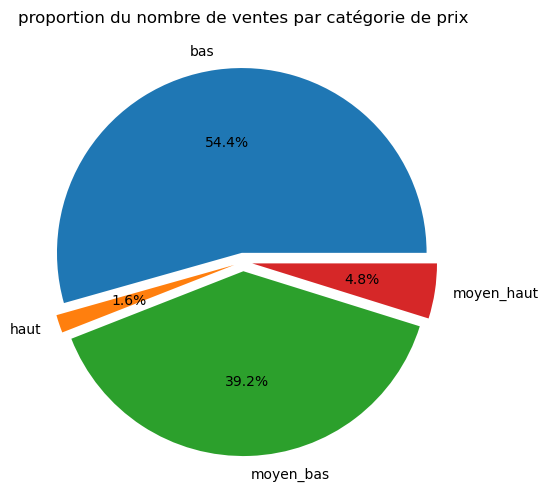

In [65]:
price_groups = online_sales.groupby("category")["total_sales"].sum()
pie, ax = plt.subplots(figsize = [6,6])
price_groups.plot.pie(autopct = "%.1f%%", explode =[0.05]*4, pctdistance=0.6)
plt.title("proportion du nombre de ventes par catégorie de prix")
plt.ylabel("")
plt.show()

#### Le plus grand nombre de ventes est généré par les bouteilles à bas prix (<20€), suivi par celles dont le prix est moyennement bas (entre 20et 50 €). Ces 2 groupes représentent 93,6% du volume des ventes.

### 6.2.4.5 - Diagramme circulaire représentant les proportions des C.A des ventes par catégorie de prix

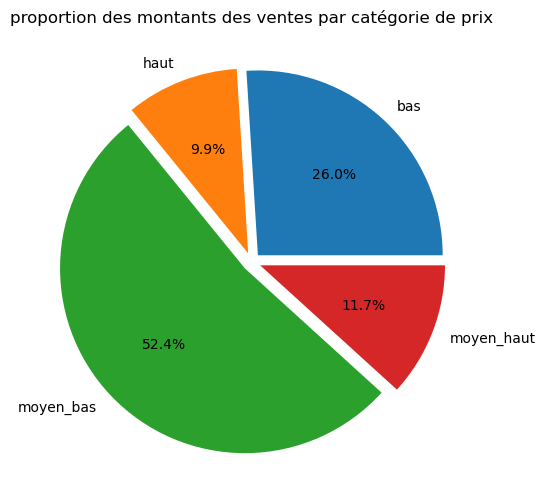

In [66]:
price_groups = online_sales.groupby("category")["ca_produit"].sum()
pie, ax = plt.subplots(figsize = [6,6])
price_groups.plot.pie(autopct = "%.1f%%", explode =[0.05]*4, pctdistance=0.6)
plt.title("proportion des montants des ventes par catégorie de prix")
plt.ylabel("")
plt.show()

#### la part de C.A la plus importante est réalisée par les bouteilles dont le prix est moyennement bas (entre 20 et 50 €), représentant plus de la moitié du C.A total (52,4%)

### 6.2.4.6 nuage de points représentant la relation du nombre de ventes par prix des articles

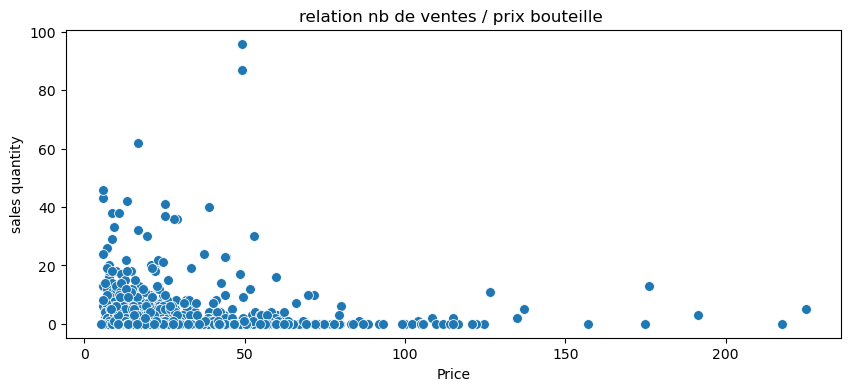

In [67]:
plt.subplots(figsize=[10,4])
sns.scatterplot(data = online_sales, x ="price", y = "total_sales", s = 50)
plt.xlabel("Price")
plt.ylabel("sales quantity")
plt.title("relation nb de ventes / prix bouteille ")
plt.show()

#### On peut voir la représentation du premier diagramme circulaire, par l'intermédiaire de ce nuage de points qui matérialise le regroupement du nombre de ventes en fonction du prix de chaque article.

### <u>6.3 - Vérification des valeurs aberrantes</u>

### 6.3.1 - Recherche des prix bas, haut et moyen.

### 6.3.1.1 - Prix bas

In [68]:
print("Le prix le plus bas est de", chiffre_affaire["price"].min(),"€")

Le prix le plus bas est de 5.2 €


### 6.3.1.2 - Prix haut

In [69]:
print("Le prix le plus haut est de", chiffre_affaire["price"].max(),"€")

Le prix le plus haut est de 225.0 €


### 6.3.1.3 - Prix moyen

In [70]:
print("Le prix moyen est de", round(chiffre_affaire["price"].mean(),2),"€")

Le prix moyen est de 32.49 €


### 6.3.2 - Visualisation des valeurs aberrantes

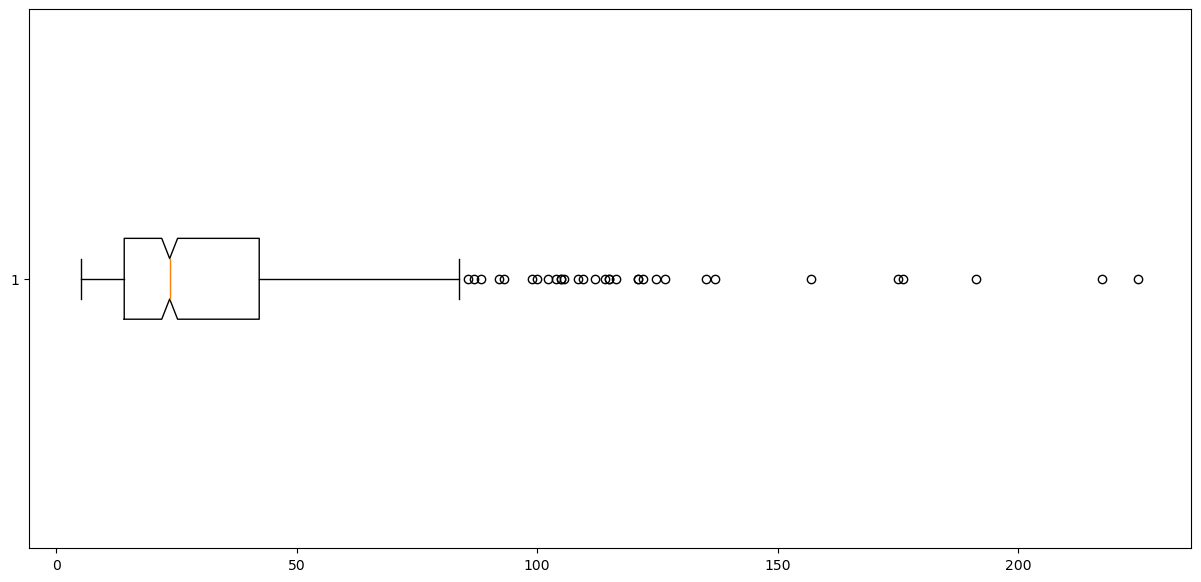

In [71]:
figure = plt.figure (figsize=(15,7))
plt.boxplot(chiffre_affaire["price"],notch = True, vert=0)
plt.show()

### 6.3.2.1 - Valeur des outliers

#### Utilisation des écarts interquartiles (IQR) pour retrouver les valeurs aberrantes.
#### - IQR = Q3 - Q1.
#### - Est considérée comme valeur aberrante, toute valeur   <u> > Q3 + (1.5 * IQR)</u>    ou    <u> < Q1 - (1.5 * IQR) </u>
#### - Le percentile (25 percentiles = 1 quartile) est un concept statistique qui permet de déterminer la position d'une valeur par rapport à un groupe donné.
#### - Q1 = 25 percentiles des données.
#### - Q3 = 75 percentiles des données.

In [72]:
def outliers (s) : # S représente le prix des produits
    iqr = (np.quantile(s, 0.75))-(np.quantile(s,0.25)) #Ecart interquartile entre quartile sup. et quartile inf.
    upper_bound = np.quantile(s,0.75)+(1.5*iqr) # Recherche des valeurs > Q3 + 1.5*iqr
    lower_bound = np.quantile(s,0.25)-(1.5*iqr) # Recherche des valeurs < Q1 - 1.5*iqr
    f = [] #Création d'une liste vide
    for i in s :
        if i > upper_bound:  
            f.append(i)          # Si le prix est > Q3 + 1.5*iqr ==> valeurs aberrantes supérieures.
        elif i < lower_bound:
            f.append(i)          # Si le prix est < Q1 - 1.5*iqr ==> valeurs aberrantes inférieures.
    nb_outliers = len(f)                # Définition du nombre de Outliers.
    ratio_outliers = len(f)/len(s)*100    # Proportion d'Outliers.        
    d = {"IQR":iqr,
        "Upper Bound": upper_bound,
        "Lower Bound": lower_bound,
        "Sum Outliers" : nb_outliers,
        "Percent Outliers":ratio_outliers}
    d = pd.DataFrame(d.items(),columns = ["sub","values"])
    return (d)

outliers(chiffre_affaire.price)

,sub,values
0,IQR,28.075000
1,Upper Bound,84.287500
2,Lower Bound,-28.012500
3,Sum Outliers,32.000000
4,Percent Outliers,4.481793


### 6.3.2.2 - Liste des valeurs aberrantes

In [73]:
val_aberrantes = (chiffre_affaire.loc[chiffre_affaire["price"] >= 83.1])
val_aberrantes.sort_values(by=["price"], ascending=False)

,id_web,onsale_web,price,total_sales,ca_produit
product_id,,,,,
4352,15940,1,225.0,5,1125.0
5001,14581,1,217.5,0,0.0
5892,14983,1,191.3,3,573.9
4402,3510,1,176.0,13,2288.0
5767,15185,1,175.0,0,0.0
4406,7819,1,157.0,0,0.0
4904,14220,1,137.0,5,685.0
6126,14923,1,135.0,2,270.0
4355,12589,1,126.5,11,1391.5


### La notion de "valeur aberrante" est difficilement applicable au marché du vin, tant la notion de prix peut être subjective, selon que l'on ait affaire à un vin de table à 1.50€ la pièce, ou bien à un grand cru pouvant aller à plusieurs centaines de milliers d'euros (  la Romanée Conti Grand Cru du Domaine de la Romanee Conti et plus précisément sur le millésime 1945 qui a été adjugé au prix de 482 000€).